Found 68943 possible sequences that correspond to a profile
Left with 5257 after 63686 < 10 reads drops
Left with 4854 after 403 < .75 pearson correlation drops


FileChooser(path='C:\Users\jaspe\PycharmProjects\Lindel', filename='', show_hidden='False')

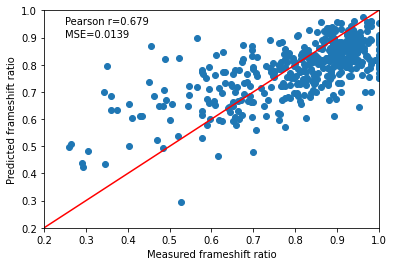

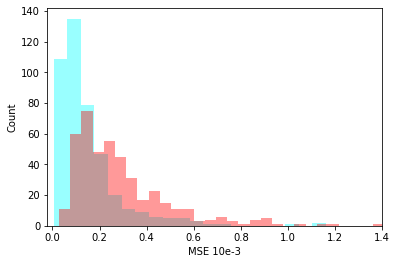

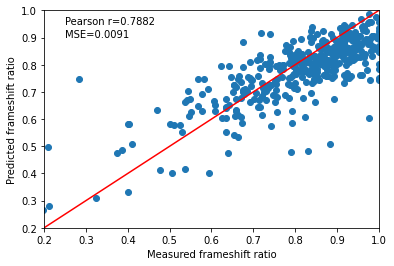

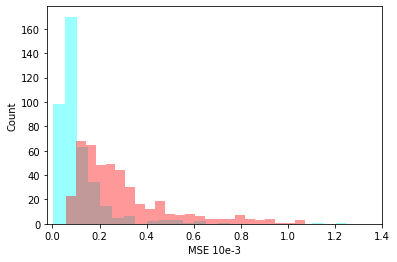

In [2]:
import pickle as pkl

import IPython.display as ids
import matplotlib.pyplot as plt
import numpy as np

from scripts.generation.gen_mh_features import frameshift_dot
from scripts.generation.matrix_load import construct_generator
from scripts.logistic_model.notebook.file_chooser import FileChooser
from scripts.logistic_model.test_models import run_test_set, mse, run_aggregate

generator = construct_generator(work_dir='cwd/')

fc = FileChooser(
            title="Select the test set to run the trained models on:",
            select_desc="Choose test set",
            change_desc="Choose different file",
            file_ends_with='.txt'
        )

def on_file_chosen(*args):

    file = fc.selected
    file_dir = f'{fc.selected_path}/'

    _, _, _, frame_shift = \
        pkl.load(open(f'{fc.selected_path}/model_prereq_fs.pkl', 'rb'))

    errors, ys, y_hats = run_test_set(file, file_dir, generator)
    frame_shift_exp = frameshift_dot(ys, frame_shift),
    frame_shift_pred = frameshift_dot(y_hats, frame_shift)
    frame_shift_mse = mse(frame_shift_exp, frame_shift_pred)
    corr = np.corrcoef(frame_shift_exp, frame_shift_pred)[1, 0]
    plt.scatter(frame_shift_exp, frame_shift_pred)
    plt.text(0.25, .95, f'Pearson r={round(corr, 4)}')
    plt.text(0.25, .9, f'MSE={round(frame_shift_mse, 4)}')
    plt.plot([0, 1], [0, 1], color='red')
    plt.xlim([0.2, 1])
    plt.ylim([0.2, 1])
    plt.xlabel("Measured frameshift ratio")
    plt.ylabel("Predicted frameshift ratio")
    plt.show()

    errors_2 = run_aggregate(file, generator)

    x_range_label = np.arange(0, 1.6, .2)
    x_range_label_str = list(map(lambda x: str(round(x, 1)), x_range_label))
    x_range = (10 ** -3) * x_range_label

    fig, (ax) = plt.subplots(nrows=1)
    ax.hist(errors, bins=38, color='aqua', alpha=.4)
    ax.hist(errors_2, bins=38, color='red', alpha=.4)
    ax.xaxis.set_ticks(x_range)
    ax.xaxis.set_ticklabels(x_range_label_str)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xlim(x_range[0] - x_range[1] / 9, x_range[-1])
    plt.xlabel("MSE 10e-3")
    plt.ylabel("Count")
    plt.show()

fc.register_callback(on_file_chosen)
ids.display(fc)

# Errors per class
# Correlation between missed reads
# Reads different drops
# Cancer cells sander
# Cosmic Database
# How much to refer to the code